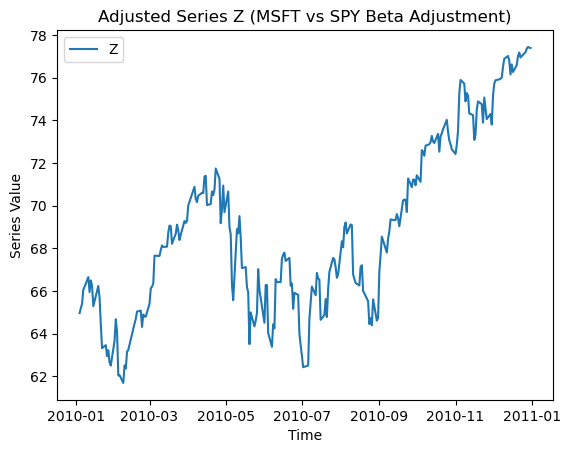

p-value = 0.7345339844860151 The series Z is likely non-stationary.


False

In [1]:
import datetime
import pandas_datareader.data as web
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

symbols = ["MSFT", "SPY"]
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2011, 1, 1)

prices = web.DataReader(symbols, "stooq", start, end)
prices = prices.sort_index()
prices = prices["Close"]

X1 = prices["MSFT"]
X2 = prices["SPY"]

X1_const = sm.add_constant(X1)  # Add constant for the intercept term
results = sm.OLS(X2, X1_const).fit()

b = results.params['MSFT']

Z = X2 - b * X1
Z.name = 'Z'

# Plot the adjusted series Z
plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.title('Adjusted Series Z (MSFT vs SPY Beta Adjustment)')
plt.show()

# Define the check_for_stationarity function
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name + ' is likely stationary.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name + ' is likely non-stationary.')
        return False

# Check for stationarity in the adjusted series Z
check_for_stationarity(Z)
